This is a small Jupyter Notebook with some exercices to test how well you can handle basic dataframes, train models, evaluate models and present the results.

In [257]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Markdown, display

#import sklearn for  
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

#import skforecasting for Time Series Forecasting
#from skforecast.recursive import ForecasterRecursive, ForecasterAutoreg

def printmd(string):
    display(Markdown(string))

Open the dataframe in data_example.csv, and plot the data. Convert the time to datetime (it is in unix ms) before plotting for each serial_no value.

In [331]:
# Reading the data from excel sheet

df = pd.read_excel('data.xlsx')

In [332]:
print(df.head(10))

# Dropping first two columns
df.drop(['Column1', 'Unnamed: 0'], axis=1, inplace=True)

print(len(df))
df.drop_duplicates(inplace=True)
print(len(df))

   Column1  Unnamed: 0  serial_no  start_time_unix_ms  delta_t_ms  on-off  \
0        2           2        227       1651049891810         683     0.0   
1        4           4         30       1651049899811         682     0.0   
2       17          17        227       1651049951809         683     0.0   
3       19          19         30       1651049959810         683     0.0   
4       32          32        227       1651050011809         683     0.0   
5       34          34         30       1651050019811         684     0.0   
6       47          47        227       1651050071810         682     0.0   
7       49          49         30       1651050079811         693     0.0   
8       62          62        227       1651050131810         682     0.0   
9       64          64         30       1651050139811         682     0.0   

   active_power_mw  output_voltage_v  output_current_ma  cg_temperature_cel  
0             13.0               0.0                0.0               960.

In [ ]:
# convert timestamps
df['start_time_unix_ms'] = pd.to_datetime(df['start_time_unix_ms'], unit='ms')
df = df.rename({'start_time_unix_ms': 'date'}, axis=1)
df = df.sort_values(by=['date']) # re-order by date

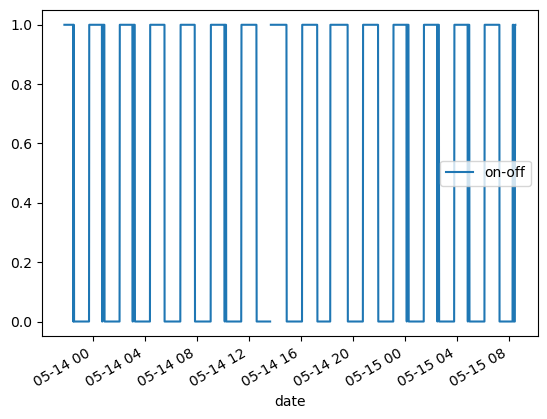

<Figure size 640x480 with 0 Axes>

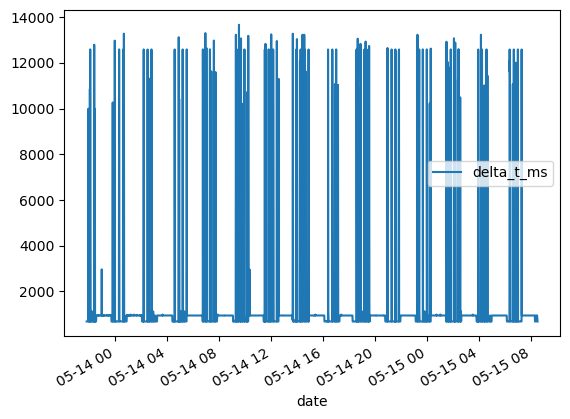

<Figure size 640x480 with 0 Axes>

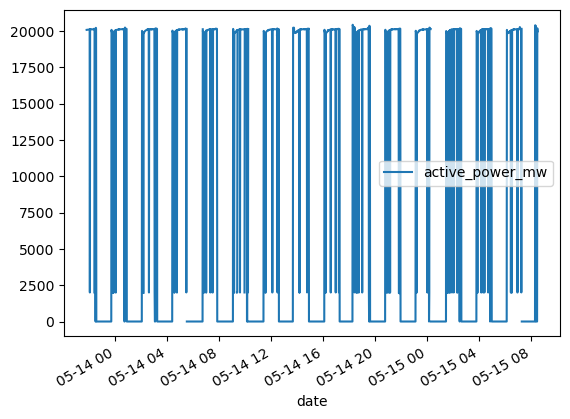

<Figure size 640x480 with 0 Axes>

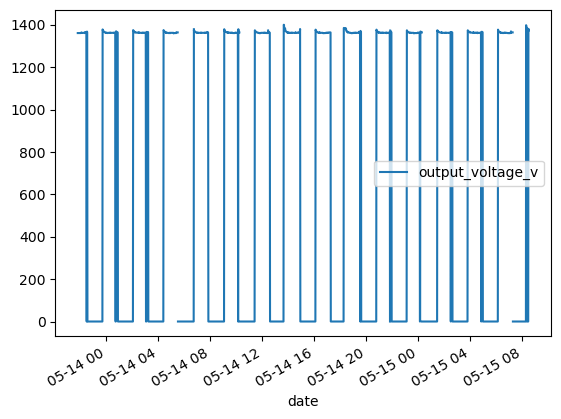

<Figure size 640x480 with 0 Axes>

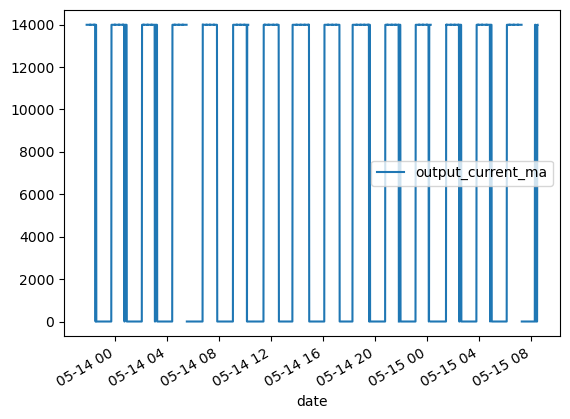

<Figure size 640x480 with 0 Axes>

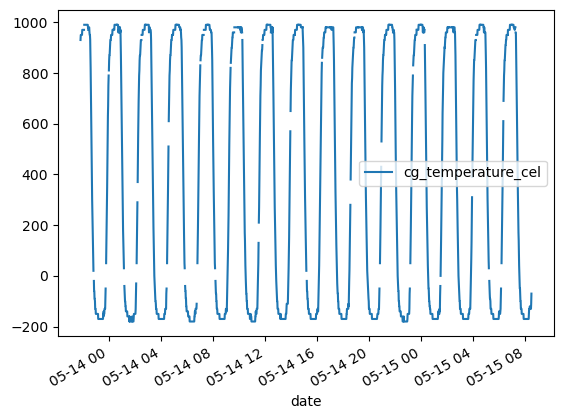

<Figure size 640x480 with 0 Axes>

In [ ]:

# Sort by serial number
serial_numbers = df['serial_no'].unique() # Only 227 and 30

# Get by serial number
df_30 = df[df['serial_no'] == 30]
df_227 = df[df['serial_no'] == 227]


time_frames_30 = df_30['date'].value_counts() # Only 227 and 30
time_frames_30.to_csv('samples/time_count.csv')

sample_30 = df_30.iloc[20000:22000]
#sample_30.to_csv('samples/sample_30_20-22.csv')

sample_30.plot(x="date", y="on-off")
plt.show()
plt.savefig('plots/on-ff.jpg')
sample_30.plot(x="date", y="delta_t_ms")
plt.show()
plt.savefig('plots/delta_t_ms.jpg')
sample_30.plot(x="date", y="active_power_mw")
plt.show()
plt.savefig('plots/active_power_mw.jpg')
sample_30.plot(x="date", y="output_voltage_v")
plt.show()
plt.savefig('plots/output_voltage_v.jpg')
sample_30.plot(x="date", y="output_current_ma")
plt.show()
plt.savefig('plots/output_current_ma.jpg')
sample_30.plot(x="date", y="cg_temperature_cel")
plt.show()
plt.savefig('plots/cg_temperature_cel.jpg')


sample_30.plot(x="date", y=[
    "on-off",
    "delta_t_ms",
    "active_power_mw",
    "output_voltage_v",
    "output_current_ma",
    "cg_temperature_cel"
])


plt.savefig('plots/sample_30.jpg')
plt.close()  # prevents figure from being displayed when code cell is executed


sample_227 = df_227.iloc[20000:22000]

#sample_227.plot(x="date", y="on-off")
#sample_227.plot(x="date", y="delta_t_ms")
#sample_227.plot(x="date", y="active_power_mw")
#sample_227.plot(x="date", y="output_voltage_v")
#sample_227.plot(x="date", y="output_current_ma")
#sample_227.plot(x="date", y="cg_temperature_cel")

sample_227.plot(x="date", y=[
    
    "on-off",
    "delta_t_ms",
    "active_power_mw",
    "output_voltage_v",
    "output_current_ma",
    "cg_temperature_cel"
])
#plt.show()
plt.savefig('plots/sample_227.jpg')
plt.close()  # prevents figure from being displayed when code cell is executed


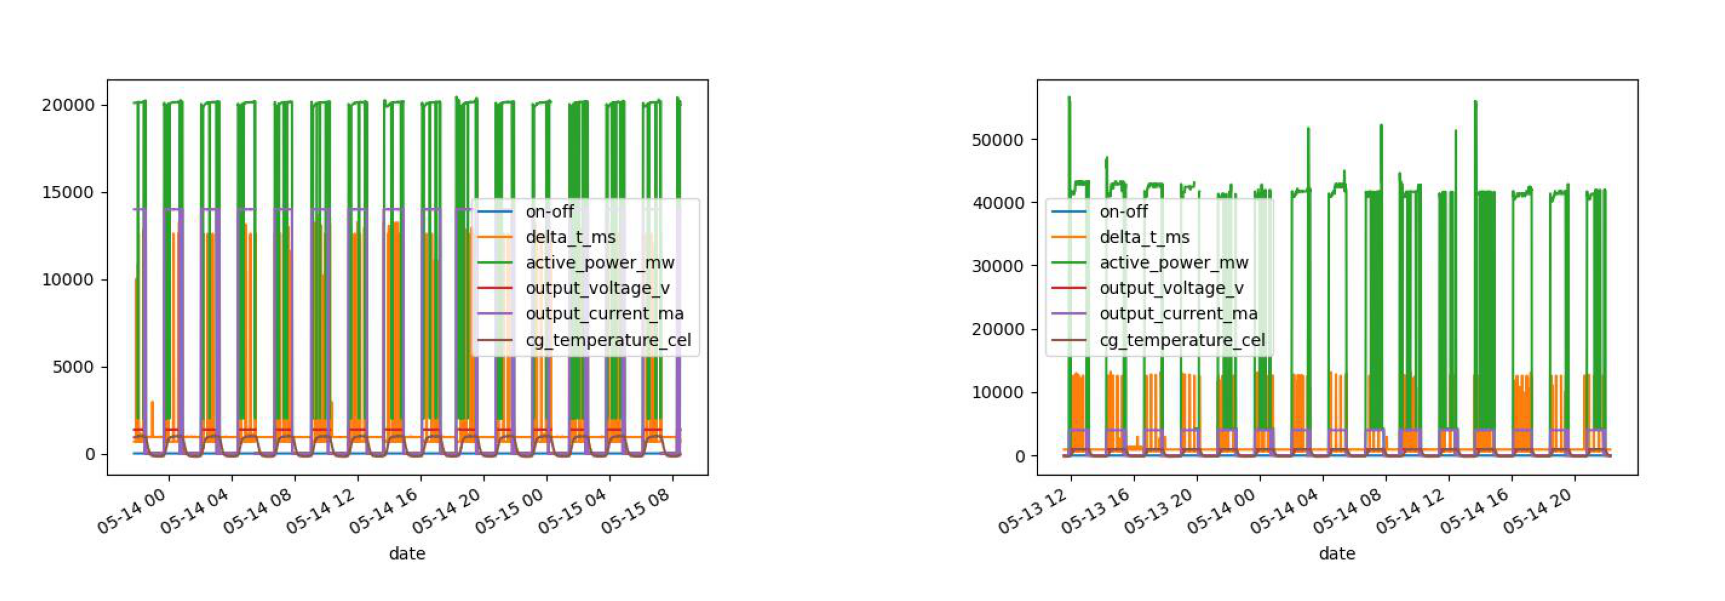

In [337]:
#Display the results

img_30 = mpimg.imread('plots/sample_30.jpg')
img_227 = mpimg.imread('plots/sample_227.jpg')

# create the subplot axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 16))

# plot the images
ax1.imshow(img_30)
ax2.imshow(img_227)

# turn of the axis
ax1.axis('off')
_ = ax2.axis('off')

Choose a serial_no, and get the points corresponding to this serial_no.

Make two regresion models to predict the values of active_power_w, output_voltage_v and output_current_ma from the columns delta_t_ms, on off, cg_temperature_cel (you dont have to use all the columns if you dont need to!), and compare the models. The two regresion algorithms must use diferent algorithms.

In [340]:
# Filter by serial number
    # Useful resource for filtering by column: https://sparkbyexamples.com/pandas/pandas-filter-by-column-value/
df_30 = df[df['serial_no'] == 30]

# Transform the values
def to_on_off(val, mean) -> int:
    if (val > mean):
        return 1
    else:
        return 0

# Future works - mean might not be the best thing to use to discern between the two categories
# but in the interest of time that's what I'm using here
output_voltage_mean = df_30.loc[:,'output_voltage_v'].mean()
output_current_mean = df_30.loc[:,'output_current_ma'].mean()
active_power_mean = df_30.loc[:,'active_power_mw'].mean()
print('Output Voltage Mean', output_voltage_mean)
print('Output Current Mean',output_current_mean)
print('Active Power Mean',active_power_mean)

df_30['output_voltage_on_off'] = df_30.loc[:,'output_voltage_v'].apply(lambda x: to_on_off(x,output_voltage_mean))
df_30['output_current_on_off'] = df_30.loc[:,'output_current_ma'].apply(lambda x: to_on_off(x,output_current_mean))
df_30['active_power_on_off'] = df_30.loc[:,'active_power_mw'].apply(lambda x: to_on_off(x,active_power_mean))
#print(df_30.head(50))


#sample_30 = df_30.iloc[65000:66000]
#sample_30.to_csv('sample_30_65-66.csv')


Output Voltage Mean 583.5639269406392
Output Current Mean 5973.92531709792
Active Power Mean 7771.276591642481


/var/folders/ch/4m8xlc297wn8w8_5bk61fd740000gn/T/ipykernel_23690/1264525968.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30['output_voltage_on_off'] = df_30.loc[:,'output_voltage_v'].apply(lambda x: to_on_off(x,output_voltage_mean))
/var/folders/ch/4m8xlc297wn8w8_5bk61fd740000gn/T/ipykernel_23690/1264525968.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30['output_current_on_off'] = df_30.loc[:,'output_current_ma'].apply(lambda x: to_on_off(x,output_current_mean))
/var/folders/ch/4m8xlc2

In [355]:
# Get the training and testing data ready for both models
df_30_nonan = df_30.dropna(how='any') # Drop rows where there are nan values as the models won't know what to do with those
#x = df_30_nonan[['cg_temperature_cel', 'on-off', 'delta_t_ms']]
x = df_30_nonan[[ 'on-off']]
active_power_y = df_30_nonan['active_power_on_off']
output_voltage_y = df_30_nonan['output_voltage_on_off']
output_current_y = df_30_nonan['output_current_on_off']
test_size = 0.3

# We have to split our data between training set, and testing set.
x_power_train, x_power_test, y_power_train, y_power_test = train_test_split(x, active_power_y, test_size = test_size)
x_voltage_train, x_voltage_test, y_voltage_train, y_voltage_test = train_test_split(x, output_voltage_y, test_size = test_size)
x_current_train, x_current_test, y_current_train, y_current_test = train_test_split(x, output_current_y, test_size = test_size)


In [356]:
## model 1

# Linear regression models for output power, voltage and current. Assuming this does not work well.
linear_regr_power = linear_model.LinearRegression()
linear_regr_voltage = linear_model.LinearRegression()
linear_regr_current = linear_model.LinearRegression()

# training model 1
linear_regr_power.fit(x_power_train, y_power_train)
linear_regr_voltage.fit(x_voltage_train, y_voltage_train)
linear_regr_current.fit(x_current_train, y_current_train)

# evaluating model1
predictions_power = linear_regr_power.predict(x_power_test)
predictions_voltage = linear_regr_voltage.predict(x_voltage_test)
predictions_current = linear_regr_current.predict(x_current_test)

mae_power = metrics.mean_absolute_error(y_power_test, predictions_power)
mse_power = metrics.mean_squared_error(y_power_test, predictions_power)
r2_power = metrics.r2_score(y_power_test, predictions_power)

mae_voltage = metrics.mean_absolute_error(y_voltage_test, predictions_voltage)
mse_voltage = metrics.mean_squared_error(y_voltage_test, predictions_voltage)
r2_voltage = metrics.r2_score(y_voltage_test, predictions_voltage)


mae_current = metrics.mean_absolute_error(y_current_test, predictions_current)
mse_current = metrics.mean_squared_error(y_current_test, predictions_current)
r2_current = metrics.r2_score(y_current_test, predictions_current)


printmd("# Linear Regression model")

printmd("## Power")
print("Power MAE: " ,mae_power)
print("Power MSE: ", mse_power)
print("R2 power", r2_power)
#plt.scatter(y_power_test, predictions_power)
#plt.show()
print("")

printmd("## Voltage")
print("Voltage MAE: " ,mae_voltage)
print("Voltage MSE: ", mse_voltage)
print("R2 voltage", r2_voltage)
#plt.scatter(y_voltage_test, predictions_voltage)
#plt.show()

printmd("## Current")
print("Current MAE: " ,mae_current)
print("Current MSE: ", mse_current)
print("R2 current", r2_current)
#plt.scatter(y_current_test, predictions_current)
#plt.show()

# Linear Regression model

## Power

Power MAE:  0.08230018162754524
Power MSE:  0.04079778367145675
R2 power 0.8289900857384993



## Voltage

Voltage MAE:  0.006801866554332681
Voltage MSE:  0.0033706926146669686
R2 voltage 0.9863275579667515


## Current

Current MAE:  0.008223330497122679
Current MSE:  0.004035411319709118
R2 current 0.983600503075617


In [357]:
# model 2
# Logistic regression. See example: https://www.datacamp.com/tutorial/understanding-logistic-regression-python

logistic_regr_power = linear_model.LogisticRegression()
logistic_regr_voltage = linear_model.LogisticRegression()
logistic_regr_current = linear_model.LogisticRegression()

# training model 2
logistic_regr_power.fit(x_power_train, y_power_train)
logistic_regr_voltage.fit(x_voltage_train, y_voltage_train)
logistic_regr_current.fit(x_current_train, y_current_train)

# evaluating model 2
target_names = ['off', 'on']
predictions_power = logistic_regr_power.predict(x_power_test)
predictions_voltage = logistic_regr_voltage.predict(x_voltage_test)
predictions_current = logistic_regr_current.predict(x_current_test)


mse_power = metrics.mean_squared_error(y_power_test, predictions_power)
cnf_matrix_power = metrics.confusion_matrix(y_power_test, predictions_power)
class_power = metrics.classification_report(y_power_test, predictions_power, target_names=target_names,  output_dict=True)


mse_voltage = metrics.mean_squared_error(y_voltage_test, predictions_voltage)
cnf_matrix_voltage = metrics.confusion_matrix(y_voltage_test, predictions_voltage)
class_voltage = metrics.classification_report(y_voltage_test, predictions_voltage, target_names=target_names, output_dict=True)

mse_current = metrics.mean_squared_error(y_current_test, predictions_current)
cnf_matrix_current = metrics.confusion_matrix(y_current_test, predictions_current)
class_current = metrics.classification_report(y_current_test, predictions_current, target_names=target_names,  output_dict=True)

printmd("# Logistic Regression model")

printmd("## Power")
print("Power MSE: ", mse_power)
print("Power confusion matrix: ", cnf_matrix_power)
print("Classification report power: ", class_power)

#plt.scatter(y_power_test, predictions_power)
#plt.show()
print("")

printmd("## Voltage")
print("Voltage MSE: ", mse_voltage)
print("Voltage confusion matrix: ", cnf_matrix_voltage)
print("Classification report voltage: ", class_voltage)

#plt.scatter(y_voltage_test, predictions_voltage)
#plt.show()

printmd("## Current")
print("Current MSE: ", mse_current)
print("Curernt confusion matrix: ", cnf_matrix_current)
print("Classification report current: ", class_current)
#plt.scatter(y_current_test, predictions_current)
#plt.show()


# Logistic Regression model

## Power

Power MSE:  0.0455202057569672
Power confusion matrix:  [[15934  1292]
 [    0 11157]]
Classification report power:  {'off': {'precision': 1.0, 'recall': 0.9249970974108905, 'f1-score': 0.961037394451146, 'support': 17226.0}, 'on': {'precision': 0.8962165635794039, 'recall': 1.0, 'f1-score': 0.9452681521647038, 'support': 11157.0}, 'accuracy': 0.9544797942430328, 'macro avg': {'precision': 0.948108281789702, 'recall': 0.9624985487054453, 'f1-score': 0.9531527733079249, 'support': 28383.0}, 'weighted avg': {'precision': 0.9592040376230635, 'recall': 0.9544797942430328, 'f1-score': 0.9548387038197879, 'support': 28383.0}}



## Voltage

Voltage MSE:  0.00338230631011521
Voltage confusion matrix:  [[15813    50]
 [   46 12474]]
Classification report voltage:  {'off': {'precision': 0.9970994388044644, 'recall': 0.996848011095001, 'f1-score': 0.996973709097787, 'support': 15863.0}, 'on': {'precision': 0.9960076652826573, 'recall': 0.9963258785942491, 'f1-score': 0.996166746526114, 'support': 12520.0}, 'accuracy': 0.9966176936898848, 'macro avg': {'precision': 0.9965535520435609, 'recall': 0.9965869448446251, 'f1-score': 0.9965702278119506, 'support': 28383.0}, 'weighted avg': {'precision': 0.9966178475529044, 'recall': 0.9966176936898848, 'f1-score': 0.9966177505522723, 'support': 28383.0}}


## Current

Current MSE:  0.004051721100658845
Curernt confusion matrix:  [[15917    54]
 [   61 12351]]
Classification report current:  {'off': {'precision': 0.9961822505945676, 'recall': 0.9966188717049652, 'f1-score': 0.9964005133181008, 'support': 15971.0}, 'on': {'precision': 0.9956469165659009, 'recall': 0.9950854012246213, 'f1-score': 0.995366079703429, 'support': 12412.0}, 'accuracy': 0.9959482788993411, 'macro avg': {'precision': 0.9959145835802342, 'recall': 0.9958521364647932, 'f1-score': 0.9958832965107649, 'support': 28383.0}, 'weighted avg': {'precision': 0.9959481468717825, 'recall': 0.9959482788993411, 'f1-score': 0.9959481513399693, 'support': 28383.0}}


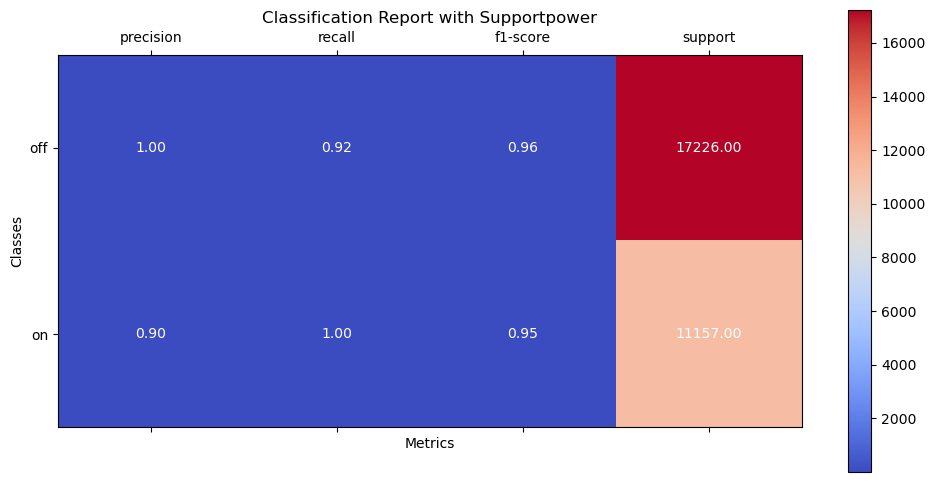

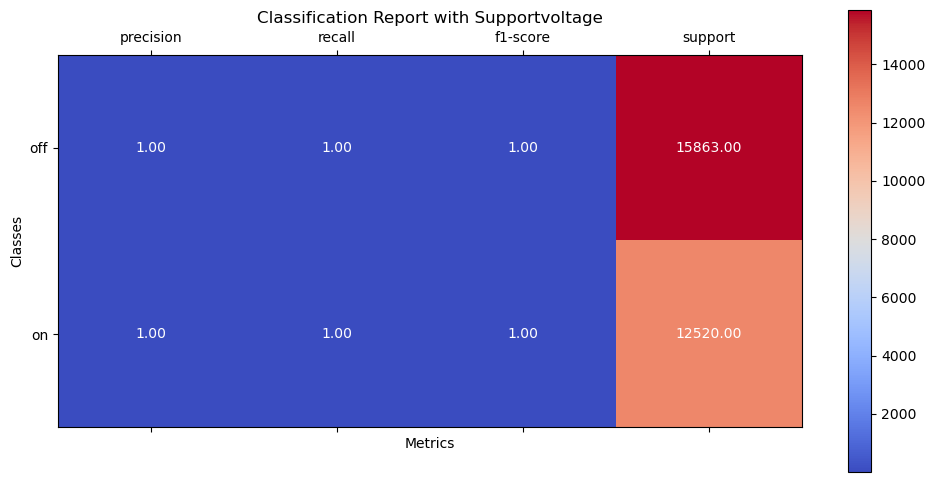

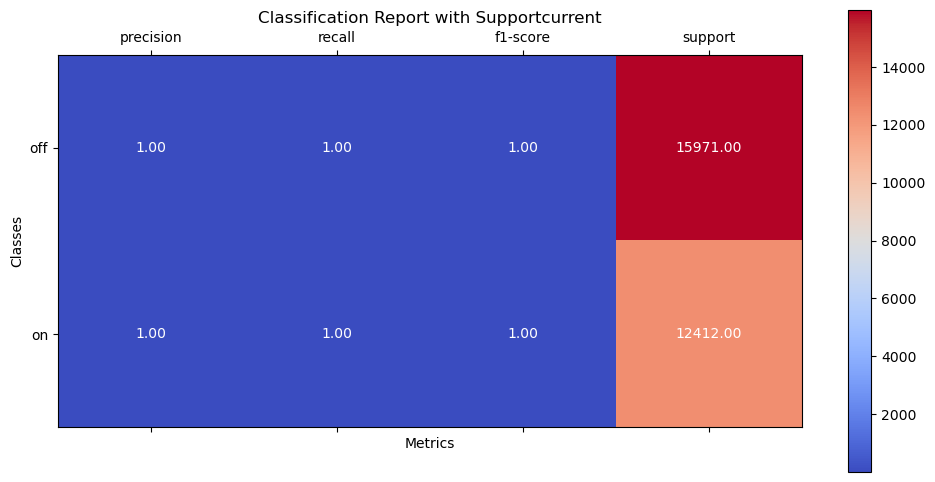

In [358]:
# Function to plot classification report with support
def plot_classification_report_with_support(report, name, inputs):
    #print()
    labels = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = np.array([[report[label][metric] for metric in metrics] for label in labels])
    fig, ax = plt.subplots(figsize=(12, 6))
    cax = ax.matshow(data, cmap='coolwarm')
    plt.xticks(range(len(metrics)), metrics)
    plt.yticks(range(len(labels)), labels)
    plt.colorbar(cax)
    # Adding the text
    for (i, j), val in np.ndenumerate(data):
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.title('Classification Report with Support' + name)

    plt.savefig("plots/class_" + name + "_" + inputs)

plot_classification_report_with_support(class_power, 'power', 'on-off')
plot_classification_report_with_support(class_voltage, 'voltage', 'on-off')
plot_classification_report_with_support(class_current, 'current', 'on-off')


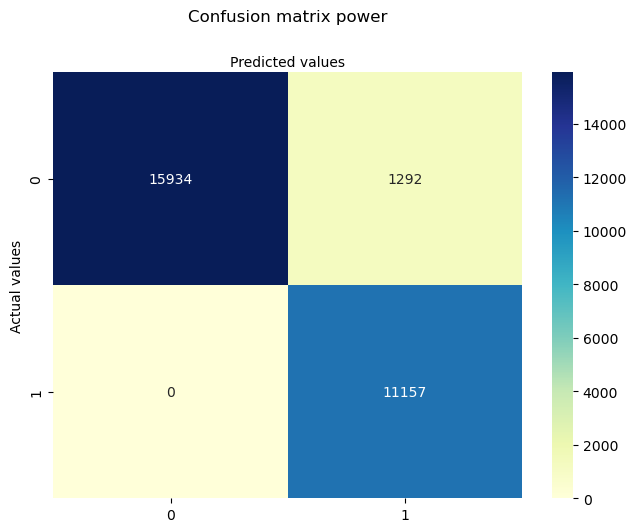

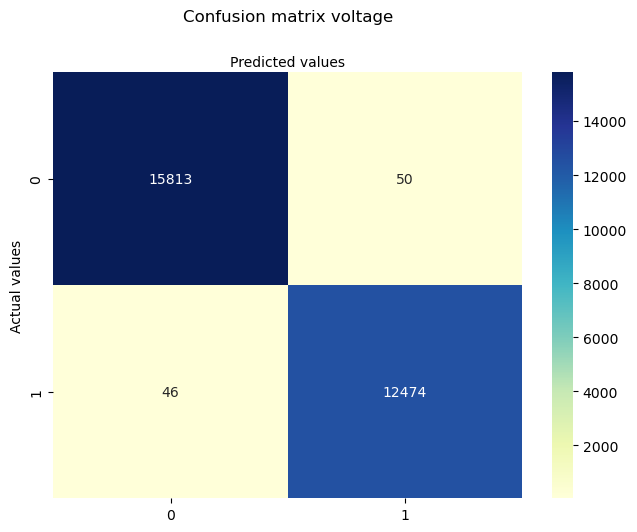

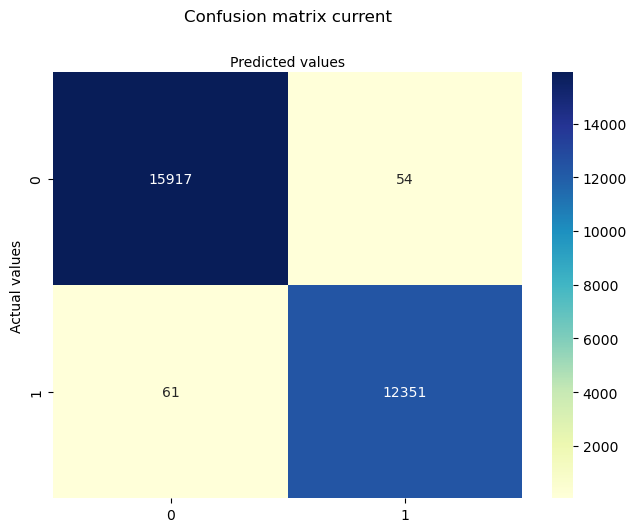

In [359]:
import seaborn as sns
def plot_confusion_matrix(cnf_matrix, title, inputs):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix ' + title, y=1.1)
    plt.ylabel('Actual values')
    plt.xlabel('Predicted values')
    plt.savefig("plots/cnf_matrix_" + title + "_" + inputs)


plot_confusion_matrix(cnf_matrix_power, title="power", inputs="on-off")
plot_confusion_matrix(cnf_matrix_voltage, title="voltage", inputs="on-off")
plot_confusion_matrix(cnf_matrix_current, title="current", inputs="on-off")



Make a model that predicts the future values of active_power_w based on the past values of active_power_w.

In [ ]:

# Helper to create discrete and regular time samples 
from sktime.forecasting.base import ForecastingHorizon
# Example of a forecaster we use from the sktime library
from sktime.forecasting.naive import NaiveForecaster # could also be an sklearn regressor

# For evaluation, pull in some meterics
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error




time_df = df_30[['date', 'active_power_mw']]
print(time_df.head(10))

# Create a discrete timing array
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2022-04-27 08:58:19.811 ", periods=200, freq="min")), is_relative=False
)

# model 
forecaster = NaiveForecaster(strategy="last") # simple example for a forecaster
# forecaster.fit(df_30_nonan[['active_power_mw']])  ## erroring

#evaluate
# prediction: y_pred = forecaster.predict(fh)

                      date  active_power_mw
1  2022-04-27 08:58:19.811             13.0
3  2022-04-27 08:59:19.810             13.0
5  2022-04-27 09:00:19.811             13.0
7  2022-04-27 09:01:19.811             13.0
9  2022-04-27 09:02:19.811             13.0
11 2022-04-27 09:03:19.811             13.0
13 2022-04-27 09:04:19.808             13.0
15 2022-04-27 09:05:19.811             13.0
17 2022-04-27 09:06:19.809             13.0
19 2022-04-27 09:07:19.811             13.0
